# Read out noise statistics
The first task we were given was to median combine bias frames. Specifically, we were told to:
```
Read-out noise
   - it can be measured by subtracting one bias file from another and divide values by sqrt(2).
   - check the stability of the readout noise by checking any changes by examining differenced bias images in the beginning of a long imaging sequence versus at the end
   - display a histogram of values (no image necessary)
```

In [55]:
import numpy as np
from PIL import Image
import os


def load_images(img_dir: str) -> np.array:
   image_files = sorted([f for f in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir, f))])
   assert image_files, "No files found"

   images = []
   try:
      for image_file in image_files:
         image_path = os.path.join(img_dir, image_file)
         print(image_file)
         img = Image.open(image_path)
         images.append(np.array(img))
      return np.array(images)
   except Exception as e:
      print(f"err:  {e}")
      return np.array([])


biases = load_images("/Users/aiden/STEMin3D/esp32-cam-project/esp32-cam-project/experiments/exp-3/bias")
assert len(biases) != 0, "No biases found."
print("Number of bias frames:", len(biases))

freezer_frames_bias__0_exp_40_quality_1_gain_1_clockrate_1_vsync_lines_0_2025-02-02T15-57-46.778Z_frame2.bmp
freezer_frames_bias__0_exp_40_quality_1_gain_1_clockrate_1_vsync_lines_0_2025-02-02T15-58-12.289Z_frame3.bmp
freezer_frames_bias__0_exp_40_quality_1_gain_1_clockrate_1_vsync_lines_0_2025-02-02T15-58-37.787Z_frame4.bmp
freezer_frames_bias__0_exp_40_quality_1_gain_1_clockrate_1_vsync_lines_0_2025-02-02T15-59-03.363Z_frame5.bmp
freezer_frames_bias__0_exp_40_quality_1_gain_1_clockrate_1_vsync_lines_0_2025-02-02T15-59-28.956Z_frame6.bmp
freezer_frames_bias__0_exp_40_quality_1_gain_1_clockrate_1_vsync_lines_0_2025-02-02T15-59-54.532Z_frame7.bmp
freezer_frames_bias__0_exp_40_quality_1_gain_1_clockrate_1_vsync_lines_0_2025-02-02T16-00-20.121Z_frame8.bmp
freezer_frames_bias__0_exp_40_quality_1_gain_1_clockrate_1_vsync_lines_0_2025-02-02T16-00-45.685Z_frame9.bmp
freezer_frames_bias__0_exp_40_quality_1_gain_1_clockrate_1_vsync_lines_0_2025-02-02T16-01-11.287Z_frame10.bmp
freezer_frames_bia

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

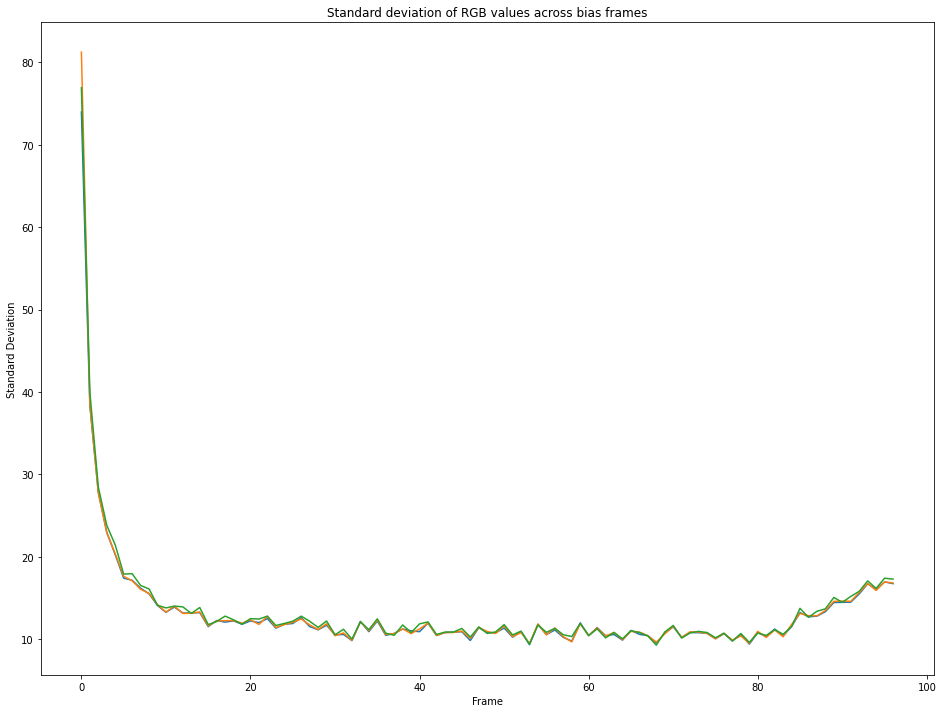

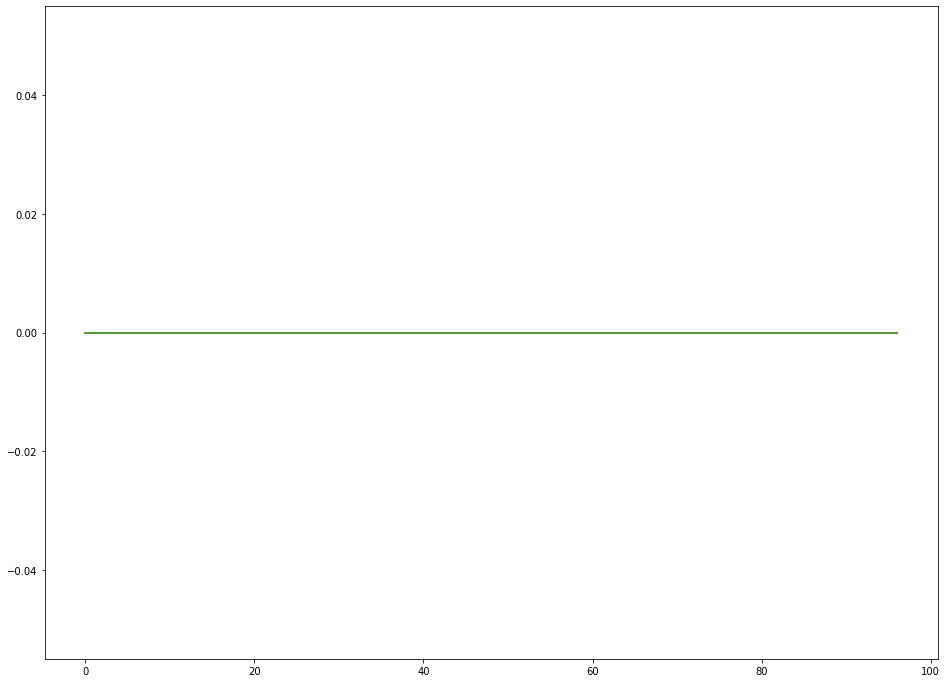

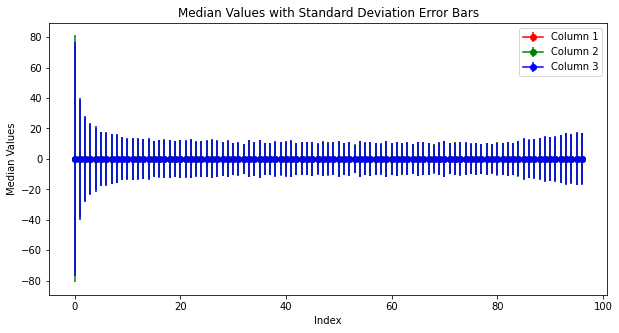

In [ ]:

subtracted_biases = (biases[1:] - biases[:-1])/ np.sqrt(2)
bias_std_dev = []
bias_median = []
# Getting the per-color standard deviation and median per image
for bias_frame in subtracted_biases:
   bias_std_dev.append([np.std(bias_frame[:,:,0]),np.std(bias_frame[:,:,1]),np.std(bias_frame[:,:,2])])
   bias_median.append([np.median(bias_frame[:,:,0]),np.median(bias_frame[:,:,1]),np.median(bias_frame[:,:,2])])

# Converting to numpy arrays for ease of examination
bias_std_dev = np.array(bias_std_dev)
bias_median = np.array(bias_median)

# std dev / frame plot
plt.figure(figsize=[16,12])
plt.xlabel('Frame')
plt.ylabel('Standard Deviation')
plt.title('Standard deviation of RGB values across bias frames')
plt.plot(bias_std_dev)


## Extra median-based plots
plt.figure(figsize=[16,12])
plt.plot(bias_median)
indices = np.arange(0, len(bias_median))

fig, ax = plt.subplots(figsize=(10, 5))
colors = ['r', 'g', 'b'] 

for i in range(3):
    ax.errorbar(indices, bias_median[:, i], yerr=bias_std_dev[:, i], fmt='o-', label=f'Column {i+1}', color=colors[i])

ax.set_xlabel('Index')
ax.set_ylabel('Median Values')
ax.set_title('Median Values with Standard Deviation Error Bars')
ax.legend()
plt.show()

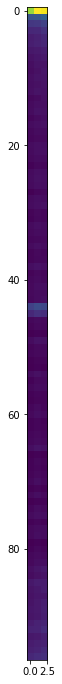

In [58]:
min_ = np.min(bias_std_dev)
max_ = np.max(bias_std_dev)
plt.figure(figsize=[16,12])
plt.imshow((bias_std_dev - min_)/(max_-min_))